# MNIST DIGIT RECOGNITION WE'LL First Visualize the Images

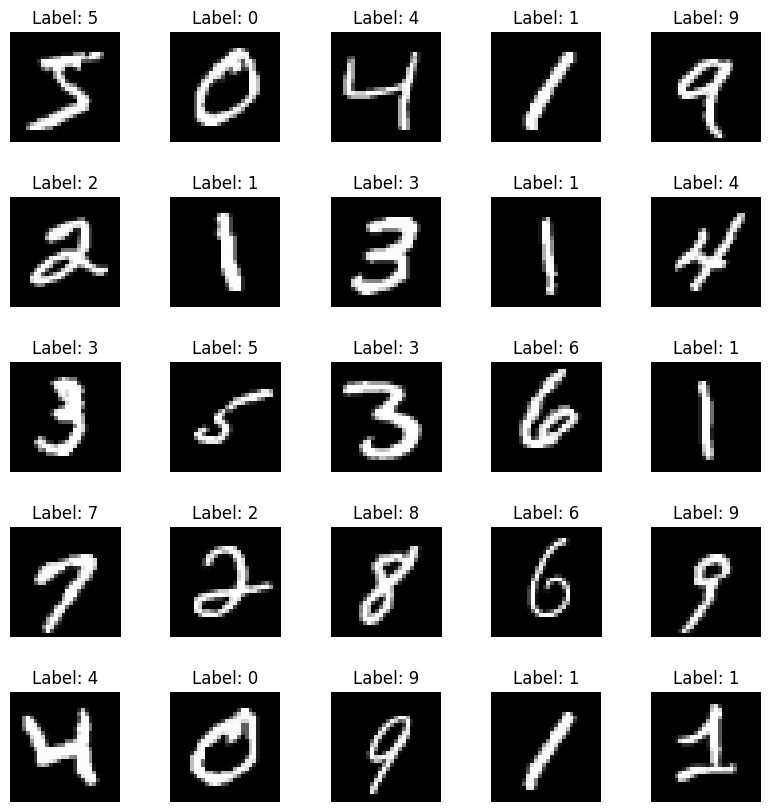

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

# Load the dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Function to plot images in a grid
def plot_images(images, labels, num_rows, num_cols):
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(10, 10))
    axes = axes.ravel()  # Flatten the 2D array of axes for easy iteration
    for i in range(num_rows * num_cols):
        axes[i].imshow(images[i], cmap='gray')
        axes[i].set_title(f'Label: {labels[i]}')
        axes[i].axis('off')
    plt.subplots_adjust(hspace=0.5)
    plt.show()

# Plot a 5x5 grid of sample images from the training set
plot_images(X_train, y_train, num_rows=5, num_cols=5)


# PREPARING THE DATA i.e. We are scaling the data and reshaping it to appropriate formats such that it could be handled by the model

In [4]:
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# Flatten the data for KNN, SVM, and RF
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)

# Reshape the data for CNN
X_train_cnn = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test_cnn = X_test.reshape(X_test.shape[0], 28, 28, 1)

# Classification Using K - Nearest Neighbours

In [5]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Initialize the KNN model
knn = KNeighborsClassifier(n_neighbors=3)

# Train the model
knn.fit(X_train_flat, y_train)

# Predict on the test set
y_pred_knn = knn.predict(X_test_flat)

# Evaluate the model
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f'KNN Accuracy: {accuracy_knn * 100:.2f}%')


KNN Accuracy: 97.05%


#  Support Vector Machine (SVM)

In [6]:
from sklearn.svm import SVC

# Initialize the SVM model
svm = SVC(kernel='linear')

# Train the model
svm.fit(X_train_flat, y_train)

# Predict on the test set
y_pred_svm = svm.predict(X_test_flat)

# Evaluate the model
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f'SVM Accuracy: {accuracy_svm * 100:.2f}%')


SVM Accuracy: 94.04%


# Random Forest (RF)

In [7]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest model
rf = RandomForestClassifier(n_estimators=100)

# Train the model
rf.fit(X_train_flat, y_train)

# Predict on the test set
y_pred_rf = rf.predict(X_test_flat)

# Evaluate the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f'Random Forest Accuracy: {accuracy_rf * 100:.2f}%')


Random Forest Accuracy: 97.00%


# CONVOLUTIONAL NEURAL NETWORK

In [9]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# One-hot encode the labels
y_train_cnn = tf.keras.utils.to_categorical(y_train, 10)
y_test_cnn = tf.keras.utils.to_categorical(y_test, 10)

# Initialize the CNN model
cnn = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile the model
cnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
cnn.fit(X_train_cnn, y_train_cnn, epochs=5, batch_size=128, validation_data=(X_test_cnn, y_test_cnn))

# Evaluate the model
loss, accuracy_cnn = cnn.evaluate(X_test_cnn, y_test_cnn)
print(f'CNN Accuracy: {accuracy_cnn * 100:.2f}%')


Epoch 1/5
469/469 [==============================] - 52s 106ms/step - loss: 0.2044 - accuracy: 0.9419 - val_loss: 0.0653 - val_accuracy: 0.9793
Epoch 2/5
469/469 [==============================] - 43s 91ms/step - loss: 0.0562 - accuracy: 0.9826 - val_loss: 0.0398 - val_accuracy: 0.9869
Epoch 3/5
469/469 [==============================] - 44s 93ms/step - loss: 0.0385 - accuracy: 0.9877 - val_loss: 0.0390 - val_accuracy: 0.9870
Epoch 4/5
469/469 [==============================] - 43s 93ms/step - loss: 0.0295 - accuracy: 0.9908 - val_loss: 0.0393 - val_accuracy: 0.9865
Epoch 5/5
313/313 [==============================] - 3s 11ms/step - loss: 0.0273 - accuracy: 0.9907
CNN Accuracy: 99.07%


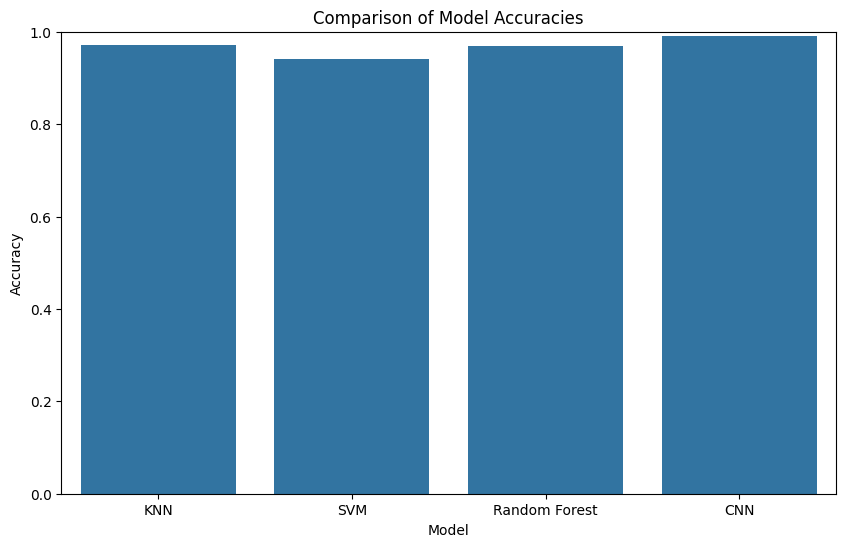

In [10]:
models = ['KNN', 'SVM', 'Random Forest', 'CNN']
accuracies = [accuracy_knn, accuracy_svm, accuracy_rf, accuracy_cnn]

# Plot the comparison
plt.figure(figsize=(10, 6))
sns.barplot(x=models, y=accuracies)
plt.title('Comparison of Model Accuracies')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim(0, 1)  # Accuracy is between 0 and 1
plt.show()